<a href="https://colab.research.google.com/github/yucaret/brewing_challenge/blob/main/lgbm_kike_brewing_data_and_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/"My Drive"/personal/iniciativas

/content/drive/My Drive/personal/iniciativas


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
def reduce_memory(ds_tmp):
    int_columns = ds_tmp.select_dtypes(include=[np.int16,np.int32,np.int64]).columns.tolist()
    for col in int_columns:
        ds_tmp[col] = pd.to_numeric(arg=ds_tmp[col], downcast='integer')

    float_columns = ds_tmp.select_dtypes(include=[np.float64]).columns.tolist()
    for col in float_columns:
        ds_tmp[col] = pd.to_numeric(arg=ds_tmp[col], downcast='float')

# **Carga de Cliente**

In [ ]:
ds_cliente = pd.read_csv('./01_input/clients_attributes.csv')

In [ ]:
ds_cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15069 entries, 0 to 15068
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Cliente           15069 non-null  int64 
 1   FechaAltaCliente  15069 non-null  object
 2   Region            15069 non-null  int64 
 3   Gerencia          15069 non-null  int64 
 4   SubCanal          15069 non-null  int64 
 5   TipoPoblacion     15069 non-null  int64 
 6   Estrato           15069 non-null  int64 
 7   EF                15069 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 941.9+ KB


In [ ]:
ds_cliente.head()

,Cliente,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF
0,1,2009-03-03,4,21,12,1,1,1
1,9,2009-03-03,4,21,9,2,3,1
2,15,2009-03-03,4,21,9,2,3,0
3,37,2009-03-03,4,21,16,2,3,1
4,43,2009-03-03,4,21,9,2,3,0


In [ ]:
# Variables de Cliente
ds_cliente['AnhoAltaCliente'] = ds_cliente['FechaAltaCliente'].str[0:4]
ds_cliente['MesAltaCliente'] = ds_cliente['FechaAltaCliente'].str[5:7]
ds_cliente = pd.get_dummies(ds_cliente, columns = ['Region'])
ds_cliente = pd.get_dummies(ds_cliente, columns = ['Gerencia'])
ds_cliente = pd.get_dummies(ds_cliente, columns = ['SubCanal'])
ds_cliente = pd.get_dummies(ds_cliente, columns = ['TipoPoblacion'])
ds_cliente = pd.get_dummies(ds_cliente, columns = ['Estrato'])
ds_cliente = pd.get_dummies(ds_cliente, columns = ['EF'])

del ds_cliente['FechaAltaCliente']

ds_cliente = pd.get_dummies(ds_cliente, columns = ['AnhoAltaCliente'])
ds_cliente = pd.get_dummies(ds_cliente, columns = ['MesAltaCliente'])

reduce_memory(ds_cliente)

In [ ]:
ds_cliente.head(10)

,Cliente,Region_1,Region_2,Region_3,Region_4,Region_5,Gerencia_1,Gerencia_2,Gerencia_3,Gerencia_4,Gerencia_5,Gerencia_6,Gerencia_7,Gerencia_8,Gerencia_9,Gerencia_10,Gerencia_11,Gerencia_12,Gerencia_13,Gerencia_14,Gerencia_15,Gerencia_16,Gerencia_17,Gerencia_18,Gerencia_19,Gerencia_20,Gerencia_21,Gerencia_22,Gerencia_23,Gerencia_24,Gerencia_25,Gerencia_26,Gerencia_27,Gerencia_28,Gerencia_29,Gerencia_30,Gerencia_31,Gerencia_32,Gerencia_33,Gerencia_34,...,SubCanal_21,SubCanal_22,SubCanal_23,SubCanal_24,SubCanal_25,SubCanal_26,SubCanal_27,TipoPoblacion_1,TipoPoblacion_2,Estrato_1,Estrato_2,Estrato_3,Estrato_4,Estrato_5,Estrato_6,EF_0,EF_1,AnhoAltaCliente_2009,AnhoAltaCliente_2010,AnhoAltaCliente_2011,AnhoAltaCliente_2012,AnhoAltaCliente_2013,AnhoAltaCliente_2014,AnhoAltaCliente_2015,AnhoAltaCliente_2016,AnhoAltaCliente_2017,AnhoAltaCliente_2018,AnhoAltaCliente_2019,MesAltaCliente_01,MesAltaCliente_02,MesAltaCliente_03,MesAltaCliente_04,MesAltaCliente_05,MesAltaCliente_06,MesAltaCliente_07,MesAltaCliente_08,MesAltaCliente_09,MesAltaCliente_10,MesAltaCliente_11,MesAltaCliente_12
0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,15,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,37,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,43,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,70,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,71,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,75,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,88,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,90,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# **Carga de Promos Activas y Ejecutadas**

In [ ]:
ds_activa = pd.read_csv('./01_input/active_promos.csv')
ds_ejecutada = pd.read_csv('./01_input/executed_promos.csv')

In [ ]:
ds_activa.count()

CodigoDC       422437
Marca          422437
Cupo           422437
Fecha_Desde    422437
Fecha_Hasta    422437
Cliente        422437
dtype: int64

In [ ]:
ds_ejecutada.count()

CodigoDC    27794
Cliente     27794
Marca       27794
Cupo        27794
dtype: int64

In [ ]:
#Variables de Promocion
ds_ejecutada['Target'] = 1

ds_promos = pd.merge(ds_activa, ds_ejecutada, how='left', on=['CodigoDC','Cliente','Marca','Cupo'])

ds_promos['CantidadPromosActivas'] = 1

ds_promos = ds_promos[['CodigoDC', 'Cliente', 'Marca', 'Cupo', 'Fecha_Desde' ,'Fecha_Hasta', 'CantidadPromosActivas', 'Target']]

ds_promos['Target'] = np.where(pd.isna(ds_promos['Target']),0, ds_promos['Target'])
ds_promos['Target'] = (ds_promos['Target']).astype(int)
ds_promos['MarcaPromo'] = ds_promos['Marca']
ds_promos['CupoPromo'] = ds_promos['Cupo']

ds_promos = pd.get_dummies(ds_promos, columns = ['MarcaPromo'])
ds_promos = pd.get_dummies(ds_promos, columns = ['CupoPromo'])

ds_promos = ds_promos[['CodigoDC', 'Cliente', 'Marca', 'Cupo', 'Target','Fecha_Desde', 'Fecha_Hasta', 'CantidadPromosActivas', 'MarcaPromo_29', 'MarcaPromo_39', 'MarcaPromo_40', 'CupoPromo_9', 'CupoPromo_16', 'CupoPromo_20']]

#Duracion de Promocion
ds_promos['FechaDesde_DT'] = pd.to_datetime(ds_promos['Fecha_Desde'])
ds_promos['FechaHasta_DT'] = pd.to_datetime(ds_promos['Fecha_Hasta'])

ds_promos['Duracion'] = (((ds_promos['FechaHasta_DT'] - ds_promos['FechaDesde_DT'])/ np.timedelta64(1, 'D')).astype(int) + 1)

del ds_promos['FechaDesde_DT'], ds_promos['FechaHasta_DT']

In [ ]:
# Variables de Fecha
ds_promos['AnhoDesda'] = ds_promos['Fecha_Desde'].str[0:4]
ds_promos['AnhoMesDesde'] = ds_promos['Fecha_Desde'].str[0:7]
ds_promos['AnhoHasta'] = ds_promos['Fecha_Hasta'].str[0:4]
ds_promos['AnhoMesHasta'] = ds_promos['Fecha_Hasta'].str[0:7]

del ds_promos['Fecha_Desde'], ds_promos['Fecha_Hasta']

ds_promos = pd.get_dummies(ds_promos, columns = ['AnhoDesda'])
ds_promos = pd.get_dummies(ds_promos, columns = ['AnhoMesDesde'])
ds_promos = pd.get_dummies(ds_promos, columns = ['AnhoHasta'])
ds_promos = pd.get_dummies(ds_promos, columns = ['AnhoMesHasta'])

reduce_memory(ds_promos)

In [ ]:
# Data de promo sumarizada a Nivel de Cliente Marca Cupo sobre Cantidades
ds_promosCantidad = ds_promos.copy()
del ds_promosCantidad['Duracion']

columnasPromo = {}

for i in ds_promosCantidad.columns[4:]:
  columnasPromo[i] = 'sum'

ds_promosCantidad = ds_promosCantidad.groupby(['Cliente','Marca','Cupo'], as_index=True ).agg(columnasPromo)
ds_promosCantidad.reset_index(inplace=True)

reduce_memory(ds_promosCantidad)

for i in ds_promosCantidad.columns[5:]:
  ds_promosCantidad = ds_promosCantidad.rename(columns={i: 'CantidadPromosActivas_' + i})

In [ ]:
# Data de promo sumarizada a Nivel de Cliente Marca Cupo sobre Duracion
ds_promosDuracion = ds_promos.copy()
del ds_promosDuracion['CantidadPromosActivas']

for i in ds_promosDuracion.columns[5:]:
  if (i!="Duracion"):
    ds_promosDuracion[i] = ds_promosDuracion[i]*ds_promosDuracion['Duracion']

columnasPromo = {}

for i in ds_promosDuracion.columns[5:]:
  columnasPromo[i] = 'sum'
  
ds_promosDuracion = ds_promosDuracion.groupby(['Cliente','Marca','Cupo'], as_index=True ).agg(columnasPromo)
ds_promosDuracion.reset_index(inplace=True)

reduce_memory(ds_promosDuracion)

for i in ds_promosDuracion.columns[3:]:
  if (i!="Duracion"):
    ds_promosDuracion = ds_promosDuracion.rename(columns={i: 'Duracion_' + i})

In [ ]:
# Data de promo sumarizada a Nivel de Cliente sobre Cantidades
columnasPromo = {}

for i in ds_promosCantidad.columns[4:]:
  columnasPromo[i] = 'sum'

ds_promosCantidadCliente = ds_promosCantidad.groupby(['Cliente'], as_index=True ).agg(columnasPromo)
ds_promosCantidadCliente.reset_index(inplace=True)

for i in ds_promosCantidadCliente.columns[1:]:
  ds_promosCantidadCliente = ds_promosCantidadCliente.rename(columns={i: 'Cliente_' + i})

In [ ]:
# Data de promo sumarizada a Nivel de Cliente sobre Duracion
columnasPromo = {}

for i in ds_promosDuracion.columns[3:]:
  columnasPromo[i] = 'sum'

ds_promosDuracionCliente = ds_promosDuracion.groupby(['Cliente'], as_index=True ).agg(columnasPromo)
ds_promosDuracionCliente.reset_index(inplace=True)

for i in ds_promosDuracionCliente.columns[1:]:
  ds_promosDuracionCliente = ds_promosDuracionCliente.rename(columns={i: 'Cliente_' + i})

In [ ]:
ds_promos = pd.merge(ds_promosCantidad, ds_promosDuracion, how='left', on=['Cliente','Marca', 'Cupo'])
ds_promos = pd.merge(ds_promos, ds_promosCantidadCliente, how='left', on=['Cliente'])
ds_promos = pd.merge(ds_promos, ds_promosDuracionCliente, how='left', on=['Cliente'])


In [ ]:
#ds_promos[["CantidadPromosActivas","Duracion"] ]
ds_promos["CantidadPromosActivas_entre_Duracion"] = ds_promos["Duracion"] / ds_promos["CantidadPromosActivas"] 
reduce_memory(ds_promos)

In [ ]:
ds_promos['Target'] = np.where(ds_promos['Target']>=1,1,0)

del ds_promosCantidad, ds_promosDuracion, ds_promosCantidadCliente, ds_promosDuracionCliente

# **Carga de Ventas**

In [ ]:
ds_ventas = pd.read_csv('./01_input/sales.csv', engine='python')
ds_ventas = ds_ventas.rename(columns={ ds_ventas.columns[1]: "AnhoVenta", "Mes": "MesVenta" })
reduce_memory(ds_ventas)

In [ ]:
ds_ventas.count()

Cliente           1894252
AnhoVenta         1894252
MesVenta          1894252
ClaseEnvase       1894252
SegmentoPrecio    1894247
Marca             1894252
Cupo              1894247
Nr                1894252
Hl                1894252
Dcto              1894252
dtype: int64

In [ ]:
# Variables de Ventas
ds_ventas['SegmentoPrecio'] = np.where(pd.isna(ds_ventas['SegmentoPrecio']), 0, ds_ventas['SegmentoPrecio'])
ds_ventas['SegmentoPrecio'] = (ds_ventas['SegmentoPrecio']).astype(int)

ds_ventas['Cupo'] = np.where(pd.isna(ds_ventas['Cupo']), 0, ds_ventas['Cupo'])
ds_ventas['Cupo'] = (ds_ventas['Cupo']).astype(int)

ds_ventas['CantidadVentas'] = 1
ds_ventas['CantidadVentas'] = (ds_ventas['CantidadVentas']).astype(int)

ds_ventas['AplicaronDescuento'] = np.where(ds_ventas['Dcto']  == 0, 0, 1)

ds_ventas = ds_ventas[['Cliente', 'Marca', 'Cupo', 'AnhoVenta', 'MesVenta', 'ClaseEnvase', 'SegmentoPrecio', 'AplicaronDescuento', 'Nr', 'Hl', 'Dcto', 'CantidadVentas']]

ds_ventas['MarcaVenta'] = ds_ventas['Marca']
ds_ventas['CupoVenta'] = ds_ventas['Cupo']

ds_ventas = pd.get_dummies(ds_ventas, columns = ['MarcaVenta'])
ds_ventas = pd.get_dummies(ds_ventas, columns = ['CupoVenta'])
ds_ventas = pd.get_dummies(ds_ventas, columns = ['ClaseEnvase'])
ds_ventas = pd.get_dummies(ds_ventas, columns = ['SegmentoPrecio'])
ds_ventas = pd.get_dummies(ds_ventas, columns = ['AplicaronDescuento'])

ds_ventas['AnhoMesVenta'] = ds_ventas['AnhoVenta'].astype(str) + '_' + ds_ventas['MesVenta'].astype(str)

ds_ventas = pd.get_dummies(ds_ventas, columns = ['AnhoVenta'])
ds_ventas = pd.get_dummies(ds_ventas, columns = ['AnhoMesVenta'])

del ds_ventas['MesVenta']

reduce_memory(ds_ventas)

In [ ]:
# Data de Ventas sumarizada a Nivel de Cliente Marca Cupo sobre Cantidades
ds_ventasCantidad = ds_ventas.copy()
del ds_ventasCantidad['Nr'], ds_ventasCantidad['Hl'], ds_ventasCantidad['Dcto']

columnasVentas = {}

for i in ds_ventasCantidad.columns[3:]:
  columnasVentas[i] = 'sum'

ds_ventasCantidad = ds_ventasCantidad.groupby(['Cliente','Marca','Cupo'], as_index=True ).agg(columnasVentas)
ds_ventasCantidad.reset_index(inplace=True)

In [ ]:
# Data de Ventas sumarizada a Nivel de Cliente Marca Cupo sobre NR
ds_ventasNr = ds_ventas.copy()
del ds_ventasNr['CantidadVentas'], ds_ventasNr['Hl'], ds_ventasNr['Dcto'], ds_ventasNr['AplicaronDescuento_0'], ds_ventasNr['AplicaronDescuento_1']

for i in ds_ventasNr.columns[4:]:
  ds_ventasNr[i] = ds_ventasNr[i]*ds_ventasNr['Nr']

ds_ventasNr['Valor_Negativo'] = np.where(ds_ventasNr['Nr']<0,1,0)
ds_ventasNr['Valor_Cero'] = np.where(ds_ventasNr['Nr']==0,1,0)
ds_ventasNr['Valor_Positivo'] = np.where(ds_ventasNr['Nr']>0,1,0)

ds_ventasNr['Rango_01'] = np.where(ds_ventasNr['Nr']<=0,1,0)
ds_ventasNr['Rango_02'] = np.where((ds_ventasNr['Nr']>0) & (ds_ventasNr['Nr']<=5800.67),1,0)
ds_ventasNr['Rango_03'] = np.where((ds_ventasNr['Nr']>5800.67) & (ds_ventasNr['Nr']<=8025.97),1,0)
ds_ventasNr['Rango_04'] = np.where((ds_ventasNr['Nr']>8025.97) & (ds_ventasNr['Nr']<=9122.23),1,0)
ds_ventasNr['Rango_05'] = np.where((ds_ventasNr['Nr']>9122.23) & (ds_ventasNr['Nr']<=10632.62),1,0)
ds_ventasNr['Rango_06'] = np.where((ds_ventasNr['Nr']>10632.62) & (ds_ventasNr['Nr']<=16254.42),1,0)
ds_ventasNr['Rango_07'] = np.where((ds_ventasNr['Nr']>16254.42) & (ds_ventasNr['Nr']<=21378.02),1,0)
ds_ventasNr['Rango_08'] = np.where((ds_ventasNr['Nr']>21378.02) & (ds_ventasNr['Nr']<=32195.49),1,0)
ds_ventasNr['Rango_09'] = np.where((ds_ventasNr['Nr']>32195.49) & (ds_ventasNr['Nr']<=53894.25),1,0)
ds_ventasNr['Rango_10'] = np.where((ds_ventasNr['Nr']>53894.25) & (ds_ventasNr['Nr']<=114747.58),1,0)
ds_ventasNr['Rango_11'] = np.where(ds_ventasNr['Nr']>114747.58,1,0)

columnasVentas = {}

for i in ds_ventasNr.columns[3:]:
  columnasVentas[i] = 'sum'

ds_ventasNr = ds_ventasNr.groupby(['Cliente','Marca','Cupo'], as_index=True ).agg(columnasVentas)
ds_ventasNr.reset_index(inplace=True)

reduce_memory(ds_ventasNr)

for i in ds_ventasNr.columns[4:]:
  ds_ventasNr = ds_ventasNr.rename(columns={i: 'Nr_' + i})

In [ ]:
# Data de Ventas sumarizada a Nivel de Cliente Marca Cupo sobre HL
ds_ventasHl = ds_ventas.copy()
del ds_ventasHl['CantidadVentas'], ds_ventasHl['Nr'], ds_ventasHl['Dcto'], ds_ventasHl['AplicaronDescuento_0'], ds_ventasHl['AplicaronDescuento_1']

for i in ds_ventasHl.columns[4:]:
  ds_ventasHl[i] = ds_ventasHl[i]*ds_ventasHl['Hl']

ds_ventasHl['Rango_01'] = np.where(ds_ventasHl['Hl']<=0.01,1,0)
ds_ventasHl['Rango_02'] = np.where((ds_ventasHl['Hl']>0.01) & (ds_ventasHl['Hl']<=0.02),1,0)
ds_ventasHl['Rango_03'] = np.where((ds_ventasHl['Hl']>0.02) & (ds_ventasHl['Hl']<=0.03),1,0)
ds_ventasHl['Rango_04'] = np.where((ds_ventasHl['Hl']>0.03) & (ds_ventasHl['Hl']<=0.04),1,0)
ds_ventasHl['Rango_05'] = np.where((ds_ventasHl['Hl']>0.05) & (ds_ventasHl['Hl']<=0.06),1,0)
ds_ventasHl['Rango_06'] = np.where((ds_ventasHl['Hl']>0.06) & (ds_ventasHl['Hl']<=0.07),1,0)
ds_ventasHl['Rango_07'] = np.where((ds_ventasHl['Hl']>0.07) & (ds_ventasHl['Hl']<=0.11),1,0)
ds_ventasHl['Rango_08'] = np.where((ds_ventasHl['Hl']>0.11) & (ds_ventasHl['Hl']<=0.18),1,0)
ds_ventasHl['Rango_09'] = np.where((ds_ventasHl['Hl']>0.18) & (ds_ventasHl['Hl']<=0.41),1,0)
ds_ventasHl['Rango_10'] = np.where((ds_ventasHl['Hl']>0.41) & (ds_ventasHl['Hl']<=0.82),1,0)
ds_ventasHl['Rango_11'] = np.where(ds_ventasHl['Hl']>0.82,1,0)

columnasVentas = {}

for i in ds_ventasHl.columns[3:]:
  columnasVentas[i] = 'sum'

ds_ventasHl = ds_ventasHl.groupby(['Cliente','Marca','Cupo'], as_index=True ).agg(columnasVentas)
ds_ventasHl.reset_index(inplace=True)

reduce_memory(ds_ventasHl)

for i in ds_ventasHl.columns[4:]:
  ds_ventasHl = ds_ventasHl.rename(columns={i: 'Hl_' + i})

In [ ]:
# Data de Ventas sumarizada a Nivel de Cliente Marca Cupo sobre Descuento
ds_ventasDcto = ds_ventas.copy()
del ds_ventasDcto['CantidadVentas'], ds_ventasDcto['Nr'], ds_ventasDcto['Hl']

for i in ds_ventasDcto.columns[4:]:
  ds_ventasDcto[i] = ds_ventasDcto[i]*ds_ventasDcto['Dcto']

columnasVentas = {}

for i in ds_ventasDcto.columns[3:]:
  columnasVentas[i] = 'sum'

ds_ventasDcto = ds_ventasDcto.groupby(['Cliente','Marca','Cupo'], as_index=True ).agg(columnasVentas)
ds_ventasDcto.reset_index(inplace=True)

reduce_memory(ds_ventasDcto)

for i in ds_ventasDcto.columns[4:]:
  ds_ventasDcto = ds_ventasDcto.rename(columns={i: 'Dcto_' + i})

In [ ]:
# Data de Ventas sumarizada a Nivel de Cliente sobre Cantidades
columnasVentas = {}

for i in ds_ventasCantidad.columns[3:]:
  columnasVentas[i] = 'sum'

ds_ventasCantidadCliente = ds_ventasCantidad.groupby(['Cliente'], as_index=True ).agg(columnasVentas)
ds_ventasCantidadCliente.reset_index(inplace=True)

for i in ds_ventasCantidadCliente.columns[1:]:
  ds_ventasCantidadCliente = ds_ventasCantidadCliente.rename(columns={i: 'Cliente_' + i})

In [ ]:
# Data de Ventas sumarizada a Nivel de Cliente sobre NR
columnasVentas = {}

for i in ds_ventasNr.columns[3:]:
  columnasVentas[i] = 'sum'

ds_ventasNrCliente = ds_ventasNr.groupby(['Cliente'], as_index=True ).agg(columnasVentas)
ds_ventasNrCliente.reset_index(inplace=True)

for i in ds_ventasNrCliente.columns[1:]:
  ds_ventasNrCliente = ds_ventasNrCliente.rename(columns={i: 'Cliente_' + i})

In [ ]:
# Data de Ventas sumarizada a Nivel de Cliente sobre HL
columnasVentas = {}

for i in ds_ventasHl.columns[3:]:
  columnasVentas[i] = 'sum'

ds_ventasHlCliente = ds_ventasHl.groupby(['Cliente'], as_index=True ).agg(columnasVentas)
ds_ventasHlCliente.reset_index(inplace=True)

for i in ds_ventasHlCliente.columns[1:]:
  ds_ventasHlCliente = ds_ventasHlCliente.rename(columns={i: 'Cliente_' + i})

In [ ]:
# Data de Ventas sumarizada a Nivel de Cliente sobre Descuento
columnasVentas = {}

for i in ds_ventasDcto.columns[3:]:
  columnasVentas[i] = 'sum'

ds_ventasDctoCliente = ds_ventasDcto.groupby(['Cliente'], as_index=True ).agg(columnasVentas)
ds_ventasDctoCliente.reset_index(inplace=True)

for i in ds_ventasDctoCliente.columns[1:]:
  ds_ventasDctoCliente = ds_ventasDctoCliente.rename(columns={i: 'Cliente_' + i})

# **Genera Base**

In [ ]:
ds_data = pd.merge(ds_promos, ds_cliente, how='left', on=['Cliente'])

ds_data = pd.merge(ds_data, ds_ventasCantidad, how='left', on=['Cliente', 'Marca', 'Cupo'])
ds_data = pd.merge(ds_data, ds_ventasNr, how='left', on=['Cliente', 'Marca', 'Cupo'])
ds_data = pd.merge(ds_data, ds_ventasHl, how='left', on=['Cliente', 'Marca', 'Cupo'])
ds_data = pd.merge(ds_data, ds_ventasDcto, how='left', on=['Cliente', 'Marca', 'Cupo'])
ds_data = pd.merge(ds_data, ds_ventasCantidadCliente, how='left', on=['Cliente'])
ds_data = pd.merge(ds_data, ds_ventasNrCliente, how='left', on=['Cliente'])
ds_data = pd.merge(ds_data, ds_ventasHlCliente, how='left', on=['Cliente'])
ds_data = pd.merge(ds_data, ds_ventasDctoCliente, how='left', on=['Cliente'])

reduce_memory(ds_data)

In [ ]:
ds_data.shape

(34551, 1261)

In [ ]:
ds_data.to_csv('./ds_data.csv',index=False)

In [ ]:
import pandas as pd
ds_data = pd.read_csv('./ds_data.csv')

In [ ]:
ds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34551 entries, 0 to 34550
Columns: 1261 entries, Cliente to Cliente_Dcto_AnhoMesVenta_2019_8
dtypes: float64(873), int64(388)
memory usage: 332.4 MB


In [ ]:
#ds_data = pd.read_csv('./ds_data.csv')
reduce_memory(ds_data)

In [ ]:
ds_data.head()

,Cliente,Marca,Cupo,Target,CantidadPromosActivas,CantidadPromosActivas_MarcaPromo_29,CantidadPromosActivas_MarcaPromo_39,CantidadPromosActivas_MarcaPromo_40,CantidadPromosActivas_CupoPromo_9,CantidadPromosActivas_CupoPromo_16,CantidadPromosActivas_CupoPromo_20,CantidadPromosActivas_AnhoDesda_2018,CantidadPromosActivas_AnhoDesda_2019,CantidadPromosActivas_AnhoMesDesde_2018-08,CantidadPromosActivas_AnhoMesDesde_2018-09,CantidadPromosActivas_AnhoMesDesde_2018-10,CantidadPromosActivas_AnhoMesDesde_2018-11,CantidadPromosActivas_AnhoMesDesde_2018-12,CantidadPromosActivas_AnhoMesDesde_2019-01,CantidadPromosActivas_AnhoMesDesde_2019-02,CantidadPromosActivas_AnhoMesDesde_2019-03,CantidadPromosActivas_AnhoMesDesde_2019-04,CantidadPromosActivas_AnhoMesDesde_2019-05,CantidadPromosActivas_AnhoMesDesde_2019-06,CantidadPromosActivas_AnhoMesDesde_2019-07,CantidadPromosActivas_AnhoMesDesde_2019-08,CantidadPromosActivas_AnhoMesDesde_2019-09,CantidadPromosActivas_AnhoHasta_2018,CantidadPromosActivas_AnhoHasta_2019,CantidadPromosActivas_AnhoMesHasta_2018-08,CantidadPromosActivas_AnhoMesHasta_2018-09,CantidadPromosActivas_AnhoMesHasta_2018-10,CantidadPromosActivas_AnhoMesHasta_2018-11,CantidadPromosActivas_AnhoMesHasta_2018-12,CantidadPromosActivas_AnhoMesHasta_2019-01,CantidadPromosActivas_AnhoMesHasta_2019-02,CantidadPromosActivas_AnhoMesHasta_2019-03,CantidadPromosActivas_AnhoMesHasta_2019-04,CantidadPromosActivas_AnhoMesHasta_2019-05,CantidadPromosActivas_AnhoMesHasta_2019-06,...,Cliente_Dcto_CupoVenta_28,Cliente_Dcto_CupoVenta_29,Cliente_Dcto_CupoVenta_30,Cliente_Dcto_CupoVenta_31,Cliente_Dcto_CupoVenta_32,Cliente_Dcto_CupoVenta_33,Cliente_Dcto_CupoVenta_34,Cliente_Dcto_CupoVenta_35,Cliente_Dcto_ClaseEnvase_1,Cliente_Dcto_ClaseEnvase_2,Cliente_Dcto_ClaseEnvase_3,Cliente_Dcto_SegmentoPrecio_0,Cliente_Dcto_SegmentoPrecio_1,Cliente_Dcto_SegmentoPrecio_2,Cliente_Dcto_SegmentoPrecio_3,Cliente_Dcto_SegmentoPrecio_4,Cliente_Dcto_AplicaronDescuento_0,Cliente_Dcto_AplicaronDescuento_1,Cliente_Dcto_AnhoVenta_2018,Cliente_Dcto_AnhoVenta_2019,Cliente_Dcto_AnhoMesVenta_2018_1,Cliente_Dcto_AnhoMesVenta_2018_10,Cliente_Dcto_AnhoMesVenta_2018_11,Cliente_Dcto_AnhoMesVenta_2018_12,Cliente_Dcto_AnhoMesVenta_2018_2,Cliente_Dcto_AnhoMesVenta_2018_3,Cliente_Dcto_AnhoMesVenta_2018_4,Cliente_Dcto_AnhoMesVenta_2018_5,Cliente_Dcto_AnhoMesVenta_2018_6,Cliente_Dcto_AnhoMesVenta_2018_7,Cliente_Dcto_AnhoMesVenta_2018_8,Cliente_Dcto_AnhoMesVenta_2018_9,Cliente_Dcto_AnhoMesVenta_2019_1,Cliente_Dcto_AnhoMesVenta_2019_2,Cliente_Dcto_AnhoMesVenta_2019_3,Cliente_Dcto_AnhoMesVenta_2019_4,Cliente_Dcto_AnhoMesVenta_2019_5,Cliente_Dcto_AnhoMesVenta_2019_6,Cliente_Dcto_AnhoMesVenta_2019_7,Cliente_Dcto_AnhoMesVenta_2019_8
0,1,29,9,0,3,3,0,0,3,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,3,0,0,0,0,0,0,0,0,0,0,0,...,0.0,-2994.199951,-1615.459961,0.0,-5568.399902,-1769.750000,-3920.169922,-3150.0,-37763.460938,-422904.65625,0.0,0.0,-395557.968750,-19955.798828,-8765.370117,-36388.968750,0.0,-460668.12500,-339919.40625,-120748.718750,-6785.540039,-47657.507812,-87510.453125,-67364.914062,0.000000,0.000000,0.00000,-3920.169922,-33515.507812,-30961.990234,-14313.019531,-47890.300781,-10475.830078,-12104.150391,-6313.220215,0.0,-12089.160156,-27357.289062,-43991.437500,-8417.629883
1,1,39,20,0,18,0,18,0,0,0,18,11,7,0,4,3,4,0,0,0,2,0,0,0,1,2,2,11,7,0,4,3,4,0,0,0,2,0,0,0,...,0.0,-2994.199951,-1615.459961,0.0,-5568.399902,-1769.750000,-3920.169922,-3150.0,-37763.460938,-422904.65625,0.0,0.0,-395557.968750,-19955.798828,-8765.370117,-36388.968750,0.0,-460668.12500,-339919.40625,-120748.718750,-6785.540039,-47657.507812,-87510.453125,-67364.914062,0.000000,0.000000,0.00000,-3920.169922,-33515.507812,-30961.990234,-14313.019531,-47890.300781,-10475.830078,-12104.150391,-6313.220215,0.0,-12089.160156,-27357.289062,-43991.437500,-8417.629883
2,1,40,16,1,18,0,0,18,0,18,0,11,7,0,4,3,4,0,0,0,2,0,0,0,1,2,2,11,7,0,4,3,4,0,0,0,2,0,0,0,...,0.0,-2994.199951,-1615.459961,0.0,-5568.399902,-1769.750000,-3920.169922,

In [ ]:
#ds_data["Cliente_Dcto_MarcaVenta_40"]
#ds_data["Duracion_MarcaPromo_40"]
#ds_data["Cliente_Dcto_CupoVenta_20"]
#ds_data["Cliente_CupoVenta_16"]


#ds_data["Duracion_MarcaPromo_40_Cliente_MarcaVenta_40"] = ds_data["Duracion_MarcaPromo_40"] / ds_data["Cliente_MarcaVenta_40"]


ds_data.loc[(ds_data['Duracion_MarcaPromo_40'] <= 5) , 'Duracion_menos_5'] =  1
ds_data["Duracion_menos_5"] = ds_data["Duracion_menos_5"].fillna(0)
ds_data.loc[(ds_data['Duracion_MarcaPromo_40'] > 5) & (ds_data['Duracion'] <= 10), 'Duracion_5_10'] =  1
ds_data["Duracion_5_10"] = ds_data["Duracion_5_10"].fillna(0)
ds_data.loc[(ds_data['Duracion_MarcaPromo_40'] > 10) & (ds_data['Duracion'] <= 20), 'Duracion_10_20'] =  1
ds_data["Duracion_10_20"] = ds_data["Duracion_10_20"].fillna(0)
ds_data.loc[(ds_data['Duracion_MarcaPromo_40'] > 20) & (ds_data['Duracion'] <= 30), 'Duracion_20_30'] =  1
ds_data["Duracion_20_30"] = ds_data["Duracion_20_30"].fillna(0)
ds_data.loc[(ds_data['Duracion_MarcaPromo_40'] > 30) & (ds_data['Duracion'] <= 40), 'Duracion_30_40'] =  1
ds_data["Duracion_30_40"] = ds_data["Duracion_30_40"].fillna(0)
ds_data.loc[(ds_data['Duracion_MarcaPromo_40'] > 40) & (ds_data['Duracion'] <= 50), 'Duracion_40_50'] =  1
ds_data["Duracion_40_50"] = ds_data["Duracion_40_50"].fillna(0)
ds_data.loc[(ds_data['Duracion_MarcaPromo_40'] > 50) & (ds_data['Duracion'] <= 60), 'Duracion_50_60'] =  1
ds_data["Duracion_50_60"] = ds_data["Duracion_50_60"].fillna(0)
ds_data.loc[(ds_data['Duracion_MarcaPromo_40'] > 60) & (ds_data['Duracion'] <= 100), 'Duracion_60_100'] =  1
ds_data["Duracion_60_100"] = ds_data["Duracion_60_100"].fillna(0)
ds_data.loc[(ds_data['Duracion_MarcaPromo_40'] > 100) & (ds_data['Duracion'] <= 150), 'Duracion_100_150'] =  1
ds_data["Duracion_100_150"] = ds_data["Duracion_100_150"].fillna(0)
ds_data.loc[(ds_data['Duracion_MarcaPromo_40'] > 150) & (ds_data['Duracion'] <= 200), 'Duracion_150_200'] =  1
ds_data["Duracion_150_200"] = ds_data["Duracion_150_200"].fillna(0)
ds_data.loc[(ds_data['Duracion_MarcaPromo_40'] > 200) , 'Duracion_mayor_200'] =  1
ds_data["Duracion_mayor_200"] = ds_data["Duracion_mayor_200"].fillna(0)


"""
1240	25	Cliente_Nr_CupoVenta_9
1241	27	CantidadPromosActivas_MarcaPromo_39
1242	27	Cliente_Nr_MarcaVenta_40 * 
1243	28	Cliente_CupoVenta_20
1244	28	Cliente_MarcaVenta_40 *
1245	29	CantidadPromosActivas_MarcaPromo_40
1246	32	CantidadPromosActivas
1247	34	Cliente_Dcto_AnhoMesVenta_2018_9
1248	34	Cliente_Nr_CupoVenta_16
1249	36	CantidadPromosActivas_MarcaPromo_29
1250	36	Cliente_CupoVenta_16
1251	37	Cliente_Dcto_AnhoMesVenta_2019_1
1252	41	Cliente_Dcto_CupoVenta_16
1253	67	Cliente_Dcto_CupoVenta_9
1254	89	Cliente_Dcto_CupoVenta_20
1255	113	Duracion_MarcaPromo_40 * 
1256	162	Cliente_Dcto_MarcaVenta_40
"""

'\n1240\t25\tCliente_Nr_CupoVenta_9\n1241\t27\tCantidadPromosActivas_MarcaPromo_39\n1242\t27\tCliente_Nr_MarcaVenta_40 * \n1243\t28\tCliente_CupoVenta_20\n1244\t28\tCliente_MarcaVenta_40 *\n1245\t29\tCantidadPromosActivas_MarcaPromo_40\n1246\t32\tCantidadPromosActivas\n1247\t34\tCliente_Dcto_AnhoMesVenta_2018_9\n1248\t34\tCliente_Nr_CupoVenta_16\n1249\t36\tCantidadPromosActivas_MarcaPromo_29\n1250\t36\tCliente_CupoVenta_16\n1251\t37\tCliente_Dcto_AnhoMesVenta_2019_1\n1252\t41\tCliente_Dcto_CupoVenta_16\n1253\t67\tCliente_Dcto_CupoVenta_9\n1254\t89\tCliente_Dcto_CupoVenta_20\n1255\t113\tDuracion_MarcaPromo_40 * \n1256\t162\tCliente_Dcto_MarcaVenta_40\n'

In [ ]:
ds_data.head()

,Cliente,Marca,Cupo,Target,CantidadPromosActivas,CantidadPromosActivas_MarcaPromo_29,CantidadPromosActivas_MarcaPromo_39,CantidadPromosActivas_MarcaPromo_40,CantidadPromosActivas_CupoPromo_9,CantidadPromosActivas_CupoPromo_16,CantidadPromosActivas_CupoPromo_20,CantidadPromosActivas_AnhoDesda_2018,CantidadPromosActivas_AnhoDesda_2019,CantidadPromosActivas_AnhoMesDesde_2018-08,CantidadPromosActivas_AnhoMesDesde_2018-09,CantidadPromosActivas_AnhoMesDesde_2018-10,CantidadPromosActivas_AnhoMesDesde_2018-11,CantidadPromosActivas_AnhoMesDesde_2018-12,CantidadPromosActivas_AnhoMesDesde_2019-01,CantidadPromosActivas_AnhoMesDesde_2019-02,CantidadPromosActivas_AnhoMesDesde_2019-03,CantidadPromosActivas_AnhoMesDesde_2019-04,CantidadPromosActivas_AnhoMesDesde_2019-05,CantidadPromosActivas_AnhoMesDesde_2019-06,CantidadPromosActivas_AnhoMesDesde_2019-07,CantidadPromosActivas_AnhoMesDesde_2019-08,CantidadPromosActivas_AnhoMesDesde_2019-09,CantidadPromosActivas_AnhoHasta_2018,CantidadPromosActivas_AnhoHasta_2019,CantidadPromosActivas_AnhoMesHasta_2018-08,CantidadPromosActivas_AnhoMesHasta_2018-09,CantidadPromosActivas_AnhoMesHasta_2018-10,CantidadPromosActivas_AnhoMesHasta_2018-11,CantidadPromosActivas_AnhoMesHasta_2018-12,CantidadPromosActivas_AnhoMesHasta_2019-01,CantidadPromosActivas_AnhoMesHasta_2019-02,CantidadPromosActivas_AnhoMesHasta_2019-03,CantidadPromosActivas_AnhoMesHasta_2019-04,CantidadPromosActivas_AnhoMesHasta_2019-05,CantidadPromosActivas_AnhoMesHasta_2019-06,...,Cliente_Dcto_SegmentoPrecio_0,Cliente_Dcto_SegmentoPrecio_1,Cliente_Dcto_SegmentoPrecio_2,Cliente_Dcto_SegmentoPrecio_3,Cliente_Dcto_SegmentoPrecio_4,Cliente_Dcto_AplicaronDescuento_0,Cliente_Dcto_AplicaronDescuento_1,Cliente_Dcto_AnhoVenta_2018,Cliente_Dcto_AnhoVenta_2019,Cliente_Dcto_AnhoMesVenta_2018_1,Cliente_Dcto_AnhoMesVenta_2018_10,Cliente_Dcto_AnhoMesVenta_2018_11,Cliente_Dcto_AnhoMesVenta_2018_12,Cliente_Dcto_AnhoMesVenta_2018_2,Cliente_Dcto_AnhoMesVenta_2018_3,Cliente_Dcto_AnhoMesVenta_2018_4,Cliente_Dcto_AnhoMesVenta_2018_5,Cliente_Dcto_AnhoMesVenta_2018_6,Cliente_Dcto_AnhoMesVenta_2018_7,Cliente_Dcto_AnhoMesVenta_2018_8,Cliente_Dcto_AnhoMesVenta_2018_9,Cliente_Dcto_AnhoMesVenta_2019_1,Cliente_Dcto_AnhoMesVenta_2019_2,Cliente_Dcto_AnhoMesVenta_2019_3,Cliente_Dcto_AnhoMesVenta_2019_4,Cliente_Dcto_AnhoMesVenta_2019_5,Cliente_Dcto_AnhoMesVenta_2019_6,Cliente_Dcto_AnhoMesVenta_2019_7,Cliente_Dcto_AnhoMesVenta_2019_8,Duracion_menos_5,Duracion_5_10,Duracion_10_20,Duracion_20_30,Duracion_30_40,Duracion_40_50,Duracion_50_60,Duracion_60_100,Duracion_100_150,Duracion_150_200,Duracion_mayor_200
0,1,29,9,0,3,3,0,0,3,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,3,0,0,0,0,0,0,0,0,0,0,0,...,0.0,-395557.968750,-19955.798828,-8765.370117,-36388.968750,0.0,-460668.12500,-339919.40625,-120748.718750,-6785.540039,-47657.507812,-87510.453125,-67364.914062,0.000000,0.000000,0.00000,-3920.169922,-33515.507812,-30961.990234,-14313.019531,-47890.300781,-10475.830078,-12104.150391,-6313.220215,0.0,-12089.160156,-27357.289062,-43991.437500,-8417.629883,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,39,20,0,18,0,18,0,0,0,18,11,7,0,4,3,4,0,0,0,2,0,0,0,1,2,2,11,7,0,4,3,4,0,0,0,2,0,0,0,...,0.0,-395557.968750,-19955.798828,-8765.370117,-36388.968750,0.0,-460668.12500,-339919.40625,-120748.718750,-6785.540039,-47657.507812,-87510.453125,-67364.914062,0.000000,0.000000,0.00000,-3920.169922,-33515.507812,-30961.990234,-14313.019531,-47890.300781,-10475.830078,-12104.150391,-6313.220215,0.0,-12089.160156,-27357.289062,-43991.437500,-8417.629883,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,40,16,1,18,0,0,18,0,18,0,11,7,0,4,3,4,0,0,0,2,0,0,0,1,2,2,11,7,0,4,3,4,0,0,0,2,0,0,0,...,0.0,-395557.968750,-19955.798828,-8765.370117,-36388.968750,0.0,-460668.12500,-339919.40625,-120748.718750,-6785.540039,-47657.507812,-87510.453125,-67364.914062,0.000000,0.000000,0.00000,-3920.169922,-33515.507812,-30961.990234,-14313.019531,-47890.300781,-10475.830078,-12104.150391,-6313.220215,0.0,-12089.160156,-27357.28

# **Modelo**

In [ ]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

# Librerias del modelo
from keras.models import Sequential
from keras.layers import BatchNormalization, Input, Dropout, Dense,Activation
from keras.regularizers import l1, l2
from keras.models import Model, load_model
from keras.callbacks import EarlyStopping

Estandarizando Datos Para Modelo

In [ ]:
ds_target = ds_data['Target']
ds_key = ds_data.iloc[:,:3]
ds_features = ds_data.iloc[:,4:]

In [ ]:
array_x = np.asarray(ds_features)
array_y = np.asarray(ds_target)

# Version 1
#array_train_x, array_valid_x, array_train_y, array_valid_y = train_test_split(array_x,
#                                                                              array_y,
#                                                                              test_size=0.02,
#                                                                              random_state=42)
#

# Version 2
array_train_x, array_valid_x, array_train_y, array_valid_y = train_test_split(array_x,
                                                                              array_y,
                                                                              test_size=0.006,
                                                                              random_state=42)


array_valid_x, array_test_x, array_valid_y, array_test_y = train_test_split(array_valid_x,
                                                                            array_valid_y,
                                                                            test_size=0.5,
                                                                            random_state=42)



del array_x, array_y

In [ ]:
array_train_x_mean = array_train_x.mean(axis=0)
print("mean for x train: ok")
array_train_x_std = array_train_x.std(axis=0)
print("std for x train: ok")

array_valid_x_mean = array_valid_x.mean(axis=0)
print("mean for x valid: ok")
array_valid_x_std = array_valid_x.std(axis=0)
print("std for x valid: ok")

array_test_x_mean = array_test_x.mean(axis=0)
print("mean for x test: ok")
array_test_x_std = array_test_x.std(axis=0)
print("std for x test: ok")


array_train_x = (array_train_x - array_train_x_mean) / array_train_x_std
array_train_x = np.where(np.isnan(array_train_x), 0, array_train_x)

array_valid_x = (array_valid_x - array_valid_x_mean) / array_valid_x_std
array_valid_x = np.where(np.isnan(array_valid_x), 0, array_valid_x)

array_test_x = (array_test_x - array_test_x_mean) / array_test_x_std
array_test_x = np.where(np.isnan(array_test_x), 0, array_test_x)

mean for x train: ok
std for x train: ok
mean for x valid: ok
std for x valid: ok
mean for x test: ok
std for x test: ok


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


#LGBM


In [ ]:
# build the lightgbm model
import lightgbm as lgb
#clf = lgb.LGBMClassifier()
#clf.fit(array_train_x, array_train_y)

num_train, num_feature = array_train_x.shape

# create dataset for lightgbm
# if you want to re-use data, remember to set free_raw_data=False
lgb_train = lgb.Dataset(array_train_x, array_train_y, free_raw_data=False)
lgb_eval = lgb.Dataset(array_test_x, array_test_y, reference=lgb_train, free_raw_data=False)

In [ ]:
!pip install bayesian-optimization

In [ ]:
from bayes_opt import BayesianOptimization

In [ ]:
##OPTIMIZACION

def bayes_parameter_opt_lgb(X, y, init_round=20, opt_round=30, n_folds=5, random_seed=6, n_estimators=10000,
                            learning_rate=0.05, output_process=False):
    # prepare data

    train_data = lgb.Dataset(data=X, label=y)
    # parameters

    def lgb_eval(num_leaves, feature_fraction, bagging_fraction, max_depth, 
                 lambda_l1, lambda_l2, min_split_gain, min_child_weight):

        params = {'objective':'regression','num_iterations':1000, 'learning_rate':0.05,
                  'early_stopping_round':100, 'metric':'rmse'}
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['lambda_l1'] = max(lambda_l1, 0)
        params['lambda_l2'] = max(lambda_l2, 0)
        params['min_split_gain'] = min_split_gain
        params['min_child_weight'] = min_child_weight
        
        cv_result = lgb.cv(params, train_data, nfold=3, seed=random_seed,
                           stratified=False, verbose_eval =200, metrics=['rmse'])

        return min(cv_result['rmse-mean'])

    # setting range of the parameters
    lgbBO = BayesianOptimization(lgb_eval, {'num_leaves': (24, 45),
                                            'feature_fraction': (0.1, 0.9),
                                            'bagging_fraction': (0.5, 1),
                                            'max_depth': (5, 8.99),
                                            'lambda_l1': (0, 5),
                                            'lambda_l2': (0, 3),
                                            'min_split_gain': (0.001, 0.1),
                                            'min_child_weight': (5, 60)}, random_state=0)
    # optimize
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    # output optimization process
    if output_process==True: lgbBO.points_to_csv("bayes_opt_result.csv")
    
    # return
    return lgbBO  #lgbBO.res['max']['max_params']

opt_params = bayes_parameter_opt_lgb(array_train_x, array_train_y, init_round=5, opt_round=10, n_folds=3,
                                     random_seed=6, n_estimators=10000, learning_rate=0.05)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | max_depth | min_ch... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[200]	cv_agg's rmse: 0.21553 + 0.00210351
|  1        |  0.2155   |  0.7744   |  0.6722   |  3.014    |  1.635    |  6.69     |  40.52    |  0.04432  |  42.73    |
[200]	cv_agg's rmse: 0.215648 + 0.00165652
[400]	cv_agg's rmse: 0.215288 + 0.00167263
|  2        |  0.2151   |  0.9818   |  0.4068   |  3.959    |  1.587    |  7.266    |  55.91    |  0.008033 |  25.83    |
[200]	cv_agg's rmse: 0.215755 + 0.00162751
|  3        |  0.2157   |  0.5101   |  0.7661   |  3.891    |  2.61     |  8.905    |  48.95    |  0.04669  |  40.39    |
[200]	cv_agg's rmse: 0.214303 + 0.00177953
|  4        |  0.2143   |  0.5591   |  0.6119   |  0.7168   |  2.834    |  7.082    |  27.81    |  0.02719  |  40.26    |
[200]	cv_agg's rmse: 0.215131 + 0.00225926
|  5        |  0.2151   |  0.7281   |  0.5547   |  0.09395  |  1.853    |  7.442    |  38.93    |  0.09443  |  38.32    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[200]	cv_agg's rmse: 0.22068 + 0.00216727
[400]	cv_agg's rmse: 0.218299 + 0.00228618
[600]	cv_agg's rmse: 0.218135 + 0.00222727
|  6        |  0.2181   |  0.7406   |  0.1282   |  4.562    |  0.1954   |  5.561    |  5.346    |  0.002552 |  24.05    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[200]	cv_agg's rmse: 0.214634 + 0.00175121
[400]	cv_agg's rmse: 0.214034 + 0.00163238
|  7        |  0.214    |  0.9179   |  0.5723   |  2.534    |  2.839    |  8.851    |  5.26     |  0.002695 |  24.67    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[200]	cv_agg's rmse: 0.216404 + 0.00189638
|  8        |  0.2162   |  0.8532   |  0.3525   |  3.483    |  0.7075   |  8.504    |  5.243    |  0.04435  |  24.33    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[200]	cv_agg's rmse: 0.216262 + 0.00159181
|  9        |  0.2162   |  0.7647   |  0.6421   |  4.896    |  1.507    |  5.973    |  5.155    |  0.03569  |  44.86    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[200]	cv_agg's rmse: 0.216971 + 0.00216888
[400]	cv_agg's rmse: 0.216173 + 0.00211422
|  10       |  0.2162   |  0.7933   |  0.4275   |  0.7051   |  2.703    |  5.214    |  5.203    |  0.01564  |  24.1     |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[200]	cv_agg's rmse: 0.217975 + 0.00195124
[400]	cv_agg's rmse: 0.217695 + 0.00188348
|  11       |  0.2177   |  0.6763   |  0.1934   |  3.819    |  0.2503   |  7.849    |  5.235    |  0.02102  |  44.81    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[200]	cv_agg's rmse: 0.217744 + 0.00209373
[400]	cv_agg's rmse: 0.217503 + 0.00207081
|  12       |  0.2175   |  0.8583   |  0.3572   |  4.076    |  0.06367  |  5.44     |  5.138    |  0.04558  |  44.25    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[200]	cv_agg's rmse: 0.216884 + 0.00220715
|  13       |  0.2167   |  0.9295   |  0.8082   |  3.282    |  0.1412   |  5.199    |  6.119    |  0.02572  |  44.97    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[200]	cv_agg's rmse: 0.217566 + 0.00176372
|  14       |  0.2176   |  0.7864   |  0.5468   |  4.907    |  0.9515   |  6.356    |  5.022    |  0.09766  |  44.71    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[200]	cv_agg's rmse: 0.216358 + 0.00167551
|  15       |  0.2164   |  0.6614   |  0.588    |  4.55     |  0.4914   |  8.966    |  5.143    |  0.09435  |  44.21    |


In [ ]:
print(opt_params)#lgbBO.res['max']['max_params']

In [ ]:
opt_params.res

[{'params': {'bagging_fraction': 0.7744067519636624,
   'feature_fraction': 0.6721514930979355,
   'lambda_l1': 3.0138168803582195,
   'lambda_l2': 1.6346495489906907,
   'max_depth': 6.690382649362229,
   'min_child_weight': 40.524176218666085,
   'min_split_gain': 0.04432113391500656,
   'num_leaves': 42.727233016423675},
  'target': 0.21551304014807018},
 {'params': {'bagging_fraction': 0.9818313802505146,
   'feature_fraction': 0.40675321506062223,
   'lambda_l1': 3.958625190413323,
   'lambda_l2': 1.5866847592587134,
   'max_depth': 7.2664977987647905,
   'min_child_weight': 55.90781510609636,
   'min_split_gain': 0.008032569761590808,
   'num_leaves': 25.829715293732356},
  'target': 0.21514878987562888},
 {'params': {'bagging_fraction': 0.5101091987201629,
   'feature_fraction': 0.7660958764383504,
   'lambda_l1': 3.8907837547492523,
   'lambda_l2': 2.6100364447404574,
   'max_depth': 8.904687185508728,
   'min_child_weight': 48.9537210319198,
   'min_split_gain': 0.046686456863

In [ ]:
# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc', 
    'learning_rate': 0.05, 
    'bagging_freq': 5,
    'verbose': 0,

    'bagging_fraction': 0.6614118673476779,
   'feature_fraction': 0.5880156675670942,
   'lambda_l1': 4.550334121816611,
   'lambda_l2': 0.4913532977785554,
   'max_depth': 9,
   'min_child_weight': 5.142732931758641,
   'min_split_gain': 0.09434813781130118,
   'num_leaves': 44
   }
   
################ v1
#params = {
#    'boosting_type': 'gbdt',
#    'objective': 'binary',
#    'metric': 'binary_logloss',
#    'num_leaves': 31,
#    'learning_rate': 0.05,
#    'feature_fraction': 0.9,
#    'bagging_fraction': 0.8,
#    'bagging_freq': 5,
#    'verbose': 0
#}

# generate feature names
feature_name = ['feature_' + str(col) for col in range(num_feature)]

print('Starting training...')
# feature_name and categorical_feature
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=60,
                valid_sets=lgb_train,  # eval training data
                feature_name=feature_name)

#####################33#v1
#gbm = lgb.train(params,
#                lgb_train,
#                num_boost_round=50,
#                valid_sets=lgb_train,  # eval training data
#                feature_name=feature_name)



print('Finished first 10 rounds...')

Starting training...
[1]	training's binary_logloss: 0.521783
[2]	training's binary_logloss: 0.491623
[3]	training's binary_logloss: 0.465395
[4]	training's binary_logloss: 0.442726
[5]	training's binary_logloss: 0.423005
[6]	training's binary_logloss: 0.404455
[7]	training's binary_logloss: 0.38706
[8]	training's binary_logloss: 0.371885
[9]	training's binary_logloss: 0.357806
[10]	training's binary_logloss: 0.345007
[11]	training's binary_logloss: 0.332612
[12]	training's binary_logloss: 0.3213
[13]	training's binary_logloss: 0.310945
[14]	training's binary_logloss: 0.300941
[15]	training's binary_logloss: 0.291937
[16]	training's binary_logloss: 0.283292
[17]	training's binary_logloss: 0.275516
[18]	training's binary_logloss: 0.267907
[19]	training's binary_logloss: 0.261018
[20]	training's binary_logloss: 0.25444
[21]	training's binary_logloss: 0.248156
[22]	training's binary_logloss: 0.242242
[23]	training's binary_logloss: 0.236865
[24]	training's binary_logloss: 0.231803
[25]	tra

In [ ]:
import json

print('Dumping model to JSON...')
# dump model to JSON (and save to file)
model_json = gbm.dump_model()

with open('model.json', 'w+') as f:
    json.dump(model_json, f, indent=4)

# feature names
print('Feature names:', gbm.feature_name())

# feature importances
print('Feature importances:', list(gbm.feature_importance()))


Dumping model to JSON...
Feature names: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_61', 'feature_62', 'feature_63', 'feature_64', 'feature_65', 'feature_66', 'feature_67', 'feature_68', 'fe

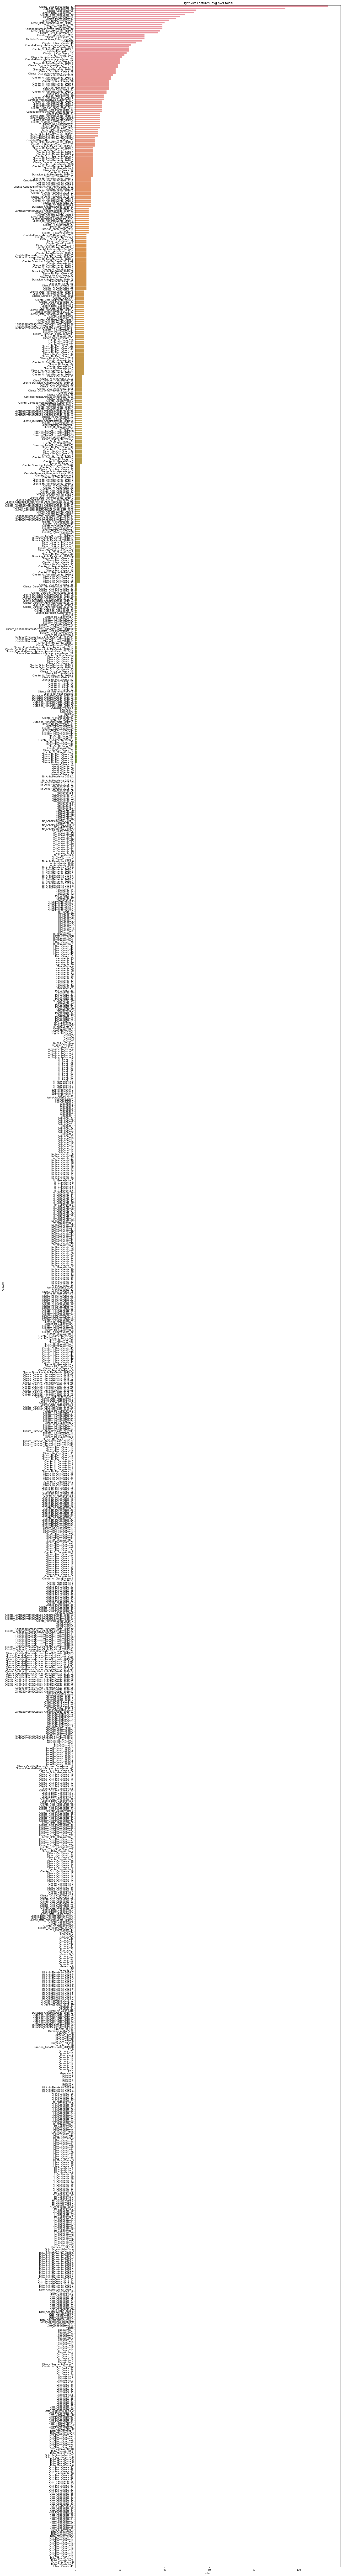

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(gbm.feature_importance(),ds_features.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 150))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
#plt.figure(figsize=(100, 100))
plt.show()
#plt.savefig('lgbm_importances-01.png')

In [ ]:
feature_imp[1240:]

,Value,Feature
1240,20,Cliente_Hl_AnhoMesVenta_2018_9
1241,20,Cliente_Hl_CupoVenta_20
1242,21,Cliente_Nr_AnhoMesVenta_2018_11
1243,22,Cliente_CupoVenta_9
1244,23,Cliente_Hl_CupoVenta_16
1245,24,CantidadPromosActivas
1246,24,Cliente_Nr_AnhoMesVenta_2019_1
1247,24,Duracion_AnhoDesda_2019
1248,25,CantidadPromosActivas_MarcaPromo_39
1249,27,Cliente_Hl_MarcaVenta_40


Test

In [ ]:
ds_test = pd.read_csv('./01_input/test.csv')

In [ ]:
ds_test = pd.merge(ds_test, ds_promos, how='left', on=['Cliente','Marca','Cupo'])
del ds_test['Ejecuto_Promo'], ds_test['Target']
ds_test = pd.merge(ds_test, ds_cliente, how='left', on=['Cliente'])

ds_test = pd.merge(ds_test, ds_ventasCantidad, how='left', on=['Cliente', 'Marca', 'Cupo'])
ds_test = pd.merge(ds_test, ds_ventasNr, how='left', on=['Cliente', 'Marca', 'Cupo'])
ds_test = pd.merge(ds_test, ds_ventasHl, how='left', on=['Cliente', 'Marca', 'Cupo'])
ds_test = pd.merge(ds_test, ds_ventasDcto, how='left', on=['Cliente', 'Marca', 'Cupo'])
ds_test = pd.merge(ds_test, ds_ventasCantidadCliente, how='left', on=['Cliente'])
ds_test = pd.merge(ds_test, ds_ventasNrCliente, how='left', on=['Cliente'])
ds_test = pd.merge(ds_test, ds_ventasHlCliente, how='left', on=['Cliente'])
ds_test = pd.merge(ds_test, ds_ventasDctoCliente, how='left', on=['Cliente'])
#####################################################################################################3333
#ds_test = pd.merge(ds_test, ds_temp_fin, how='left', on=['Cliente','Marca','Cupo']) 

reduce_memory(ds_test)

In [ ]:
ds_test.head(5)

,Cliente,Marca,Cupo,CantidadPromosActivas,CantidadPromosActivas_MarcaPromo_29,CantidadPromosActivas_MarcaPromo_39,CantidadPromosActivas_MarcaPromo_40,CantidadPromosActivas_CupoPromo_9,CantidadPromosActivas_CupoPromo_16,CantidadPromosActivas_CupoPromo_20,CantidadPromosActivas_AnhoDesda_2018,CantidadPromosActivas_AnhoDesda_2019,CantidadPromosActivas_AnhoMesDesde_2018-08,CantidadPromosActivas_AnhoMesDesde_2018-09,CantidadPromosActivas_AnhoMesDesde_2018-10,CantidadPromosActivas_AnhoMesDesde_2018-11,CantidadPromosActivas_AnhoMesDesde_2018-12,CantidadPromosActivas_AnhoMesDesde_2019-01,CantidadPromosActivas_AnhoMesDesde_2019-02,CantidadPromosActivas_AnhoMesDesde_2019-03,CantidadPromosActivas_AnhoMesDesde_2019-04,CantidadPromosActivas_AnhoMesDesde_2019-05,CantidadPromosActivas_AnhoMesDesde_2019-06,CantidadPromosActivas_AnhoMesDesde_2019-07,CantidadPromosActivas_AnhoMesDesde_2019-08,CantidadPromosActivas_AnhoMesDesde_2019-09,CantidadPromosActivas_AnhoHasta_2018,CantidadPromosActivas_AnhoHasta_2019,CantidadPromosActivas_AnhoMesHasta_2018-08,CantidadPromosActivas_AnhoMesHasta_2018-09,CantidadPromosActivas_AnhoMesHasta_2018-10,CantidadPromosActivas_AnhoMesHasta_2018-11,CantidadPromosActivas_AnhoMesHasta_2018-12,CantidadPromosActivas_AnhoMesHasta_2019-01,CantidadPromosActivas_AnhoMesHasta_2019-02,CantidadPromosActivas_AnhoMesHasta_2019-03,CantidadPromosActivas_AnhoMesHasta_2019-04,CantidadPromosActivas_AnhoMesHasta_2019-05,CantidadPromosActivas_AnhoMesHasta_2019-06,CantidadPromosActivas_AnhoMesHasta_2019-07,...,Cliente_Dcto_CupoVenta_28,Cliente_Dcto_CupoVenta_29,Cliente_Dcto_CupoVenta_30,Cliente_Dcto_CupoVenta_31,Cliente_Dcto_CupoVenta_32,Cliente_Dcto_CupoVenta_33,Cliente_Dcto_CupoVenta_34,Cliente_Dcto_CupoVenta_35,Cliente_Dcto_ClaseEnvase_1,Cliente_Dcto_ClaseEnvase_2,Cliente_Dcto_ClaseEnvase_3,Cliente_Dcto_SegmentoPrecio_0,Cliente_Dcto_SegmentoPrecio_1,Cliente_Dcto_SegmentoPrecio_2,Cliente_Dcto_SegmentoPrecio_3,Cliente_Dcto_SegmentoPrecio_4,Cliente_Dcto_AplicaronDescuento_0,Cliente_Dcto_AplicaronDescuento_1,Cliente_Dcto_AnhoVenta_2018,Cliente_Dcto_AnhoVenta_2019,Cliente_Dcto_AnhoMesVenta_2018_1,Cliente_Dcto_AnhoMesVenta_2018_10,Cliente_Dcto_AnhoMesVenta_2018_11,Cliente_Dcto_AnhoMesVenta_2018_12,Cliente_Dcto_AnhoMesVenta_2018_2,Cliente_Dcto_AnhoMesVenta_2018_3,Cliente_Dcto_AnhoMesVenta_2018_4,Cliente_Dcto_AnhoMesVenta_2018_5,Cliente_Dcto_AnhoMesVenta_2018_6,Cliente_Dcto_AnhoMesVenta_2018_7,Cliente_Dcto_AnhoMesVenta_2018_8,Cliente_Dcto_AnhoMesVenta_2018_9,Cliente_Dcto_AnhoMesVenta_2019_1,Cliente_Dcto_AnhoMesVenta_2019_2,Cliente_Dcto_AnhoMesVenta_2019_3,Cliente_Dcto_AnhoMesVenta_2019_4,Cliente_Dcto_AnhoMesVenta_2019_5,Cliente_Dcto_AnhoMesVenta_2019_6,Cliente_Dcto_AnhoMesVenta_2019_7,Cliente_Dcto_AnhoMesVenta_2019_8
0,10,40,16,21,0,0,21,0,21,0,11,10,0,4,3,4,0,1,0,2,1,1,0,1,2,2,11,10,0,4,3,4,0,1,0,2,1,0,0,1,...,0.0,-7169.910156,-717.989990,-205.710007,-5555.750000,0.000000,-7384.030273,-5400.0,-116905.835938,-1.817231e+06,0.0,0.0,-1.507927e+06,-33943.371094,-328624.531250,-63642.132812,0.0,-1934136.750,-1.494109e+06,-440027.718750,-63029.320312,-163943.812500,-289801.062500,-157526.937500,-44528.589844,-114701.171875,-139771.812500,-75364.375000,-93530.171875,-123260.281250,-160558.312500,-68093.179688,-68379.406250,-108857.460938,-63302.671875,-37508.679688,-28139.050781,-71065.195312,-19416.800781,-43358.460938
1,17,29,9,4,4,0,0,4,0,0,0,4,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,4,0,0,0,0,0,0,0,0,1,1,0,0,...,0.0,-29635.330078,-27074.550781,-822.859985,-21134.621094,-13627.060547,-31403.378906,-4320.0,-567738.312500,-2.499202e+06,0.0,0.0,-2.117430e+06,-351101.281250,-336727.375000,-261682.109375,0.0,-3066940.250,-2.269518e+06,-797421.625000,-296342.687500,-197973.921875,-285545.937500,-145571.625000,-141727.812500,-162150.578125,-54423.398438,-79868.312500,-235854.437500,-246409.015625,-223142.781250,-200508.078125,-131625.781250,-175513.109375,-116557.007812,-28600.468750,-57887.812500,-41383.640625,-121067.742188,-124786.062500
2,37,29,9,3,3,0,0,3,0,0

In [ ]:
ds_test.columns

Index(['Cliente', 'Marca', 'Cupo', 'CantidadPromosActivas',
       'CantidadPromosActivas_MarcaPromo_29',
       'CantidadPromosActivas_MarcaPromo_39',
       'CantidadPromosActivas_MarcaPromo_40',
       'CantidadPromosActivas_CupoPromo_9',
       'CantidadPromosActivas_CupoPromo_16',
       'CantidadPromosActivas_CupoPromo_20',
       ...
       'Cliente_Dcto_AnhoMesVenta_2018_8', 'Cliente_Dcto_AnhoMesVenta_2018_9',
       'Cliente_Dcto_AnhoMesVenta_2019_1', 'Cliente_Dcto_AnhoMesVenta_2019_2',
       'Cliente_Dcto_AnhoMesVenta_2019_3', 'Cliente_Dcto_AnhoMesVenta_2019_4',
       'Cliente_Dcto_AnhoMesVenta_2019_5', 'Cliente_Dcto_AnhoMesVenta_2019_6',
       'Cliente_Dcto_AnhoMesVenta_2019_7', 'Cliente_Dcto_AnhoMesVenta_2019_8'],
      dtype='object', length=1260)

In [ ]:
ds_test_key = ds_test.iloc[:,:3]
ds_test_features = ds_test.iloc[:,3:]

In [ ]:
array_hipo_x = np.asarray(ds_test_features)

array_hipo_x_mean = array_hipo_x.mean(axis=0)
print("mean for x hipo: ok")
array_hipo_x_std = array_hipo_x.std(axis=0)
print("std for x hipo: ok")

array_hipo_x = (array_hipo_x - array_hipo_x_mean) / array_hipo_x_std
array_hipo_x = np.where(np.isnan(array_hipo_x), 0, array_hipo_x)

#array_hipo_y = executePromo.predict(array_hipo_x)
array_hipo_y = gbm.predict(array_hipo_x)

#array_hipo_y = np.reshape(array_hipo_y, len(array_hipo_y))

mean for x hipo: ok
std for x hipo: ok


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
str_version = '4'

ds_test_key_target = ds_test_key.copy()

ds_test_key_target['Ejecuto_Promo'] = array_hipo_y


In [ ]:
ds_test_key_target.head()

,Cliente,Marca,Cupo,Ejecuto_Promo
0,10,40,16,0.302043
1,17,29,9,0.115039
2,37,29,9,0.015307
3,46,29,9,0.059269
4,48,29,9,0.015307


In [ ]:
ds_test_key_target.head()

,Cliente,Marca,Cupo,Ejecuto_Promo
0,10,40,16,0.302043
1,17,29,9,0.115039
2,37,29,9,0.015307
3,46,29,9,0.059269
4,48,29,9,0.015307


In [ ]:
ds_test_key_target.to_csv("result_lgbm_porc_HITO10.csv",index=False)